In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## Set Up Data

In [35]:
data_dir = "../../data/cell_images"

In [36]:
os.listdir(data_dir)

['train', 'test']

In [37]:
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [38]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [39]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [40]:
os.listdir(train_path + "parasitized")[0:5]

['C101P62ThinF_IMG_20150918_151942_cell_72.png',
 'C176P137NThinF_IMG_20151201_121303_cell_110.png',
 'C129P90ThinF_IMG_20151004_134636_cell_17.png',
 'C182P143NThinF_IMG_20151201_171950_cell_186.png',
 'C68P29N_ThinF_IMG_20150819_133447_cell_145.png']

In [41]:
# Let's check out a single image
os.listdir(train_path + "parasitized")[0]
para_cell = train_path + "parasitized/C101P62ThinF_IMG_20150918_151942_cell_72.png"

In [42]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [43]:
imread(para_cell).shape

(160, 148, 3)

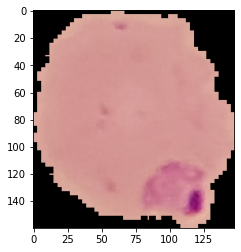

In [44]:
plt.imshow(imread(para_cell))

In [45]:
os.listdir(train_path+"uninfected")[0]
uninfected_cell = train_path + "uninfected/C107P68ThinF_IMG_20150924_222535_cell_84.png"

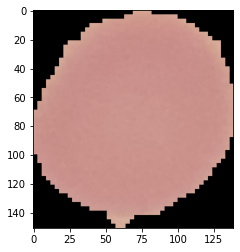

In [46]:
plt.imshow(imread(uninfected_cell))

In [47]:
print(len(os.listdir(train_path+"parasitized")))
print(len(os.listdir(train_path+"uninfected")))

12480
12480


In [48]:
# Image datasets do not always have same dimensions. To deal with that, we do the following

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"uninfected"):
    img = imread(test_path+"uninfected/"+image_filename)

    d1,d2,colors = img.shape  # check image shape
    dim1.append(d1)           # record first dimension
    dim2.append(d2)           # record second dimension


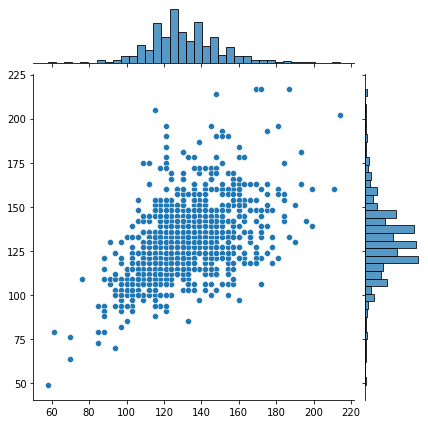

In [49]:
# We need to resize, so let's investigate the dimensions
sns.jointplot(x=dim1, y=dim2);

In [50]:
# looks like the mean values will suffice
print(np.mean(dim1),np.mean(dim2))

image_shape = (130, 130, 3)

130.92538461538462 130.75


## Data Processing

In [51]:
# It is great to be able to expand our dataset without gathering more data.
# For this, we augment:

image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               # rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

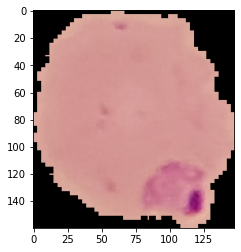

In [56]:
para_img = imread(para_cell)
plt.imshow(para_img);

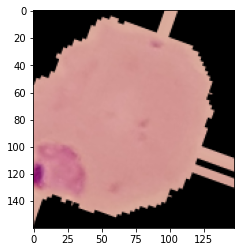

In [60]:
plt.imshow(image_gen.random_transform(para_img));

In [62]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [65]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
               metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [69]:
# large data, so we will use batching
batch_size = 16

In [70]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [71]:
# When running test data, be sure not to shuffle
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [72]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])